# FUNÇÕES PARTE II: ARGUMENTOS, DESPACHO MÚLTIPLO E RECURSIVIDADE

## ARGUMENTOS: TIPADOS, PADRONIZADOS E NOMEADOS

Será utilizado a função `empuxo` em várias versões tendo como base os argumentos volume, densidade e aceleração da gravidade. Dada a função `empuxo` definida de forma usual:

In [1]:
function empuxo_0( v, d, g)
    println("Volume: $v m³")
    println("Densidade: $d kg/m³")
    println("A.gravidade: $g m/s²")
    
    return v*d*g
end

empuxo_0 (generic function with 1 method)

In [2]:
empuxo_0( 0.05, 1, 10)

Volume: 0.05 m³
Densidade: 1 kg/m³
A.gravidade: 10 m/s²


0.5

**Argumentos Tipados**

É possível definir um tipo para um argumento dentre os vários tipos disponíveis ou construídos em Julia. Dessa forma a função somente aceitará os valores do tipo definido e qualquer valor diferente implicará em erro.

In [3]:
function empuxo_1( v, d::Float64, g::Float64)
    println("Volume: $v m³")
    println("Densidade: $d kg/m³")
    println("A.gravidade: $g m/s²")
    
    return v*d*g
end

empuxo_1 (generic function with 1 method)

In [4]:
empuxo_1(0.05, 1.0, 10.0)

Volume: 0.05 m³
Densidade: 1.0 kg/m³
A.gravidade: 10.0 m/s²


0.5

In [5]:
# passando os tipos Float64, Float64 e Int64
empuxo_1(0.05, 1.0, 10)

LoadError: MethodError: no method matching empuxo_1(::Float64, ::Float64, ::Int64)
Closest candidates are:
  empuxo_1(::Any, ::Float64, !Matched::Float64) at In[3]:2

Observe que o erro `"no method matching empuxo_0(::Float64, ::Float64, ::Int64)"` significa que não há um método compatível com os argumentos passados em `(0.05 ::Float64, 1.0 ::Float64, 10 ::Int64`). O erro está no argumento `gravidade` que foi passado como inteiro e deve ser do tipo `Float64`. `Julia` informa o local do erro e tipo correto em  `!Matched::Float64`.
```
```

**Argumentos padronizados**

In [6]:
# Função genérica

function empuxo_2( v, d = 1.0, g = 9.8)
    println("Volume: $v m³")
    println("Densidade: $d kg/m³")
    println("A.gravidade: $g m/s²")
    
    return v*d*g
end

empuxo_2 (generic function with 3 methods)

In [7]:
empuxo_2(0.05, 1.0, 10)

Volume: 0.05 m³
Densidade: 1.0 kg/m³
A.gravidade: 10 m/s²


0.5

In [8]:
# se não for passado nenhum outro parâmetro a função utiliza os valores padrões
empuxo_2(0.05)

Volume: 0.05 m³
Densidade: 1.0 kg/m³
A.gravidade: 9.8 m/s²


0.49000000000000005

In [9]:
# a ordem dos argumentos importa
empuxo_2(0.05, 10, 1.0)

Volume: 0.05 m³
Densidade: 10 kg/m³
A.gravidade: 1.0 m/s²


0.5

Observe que neste exemplo a ordem dos elementos é importante e embora o valor calculado esteja certo, os valores das variáveis estão trocados.

```
```

**Argumentos Nomeados**

Algumas funções precisam de um grande número de argumentos ou têm um grande número de comportamentos. Lembrar como chamar essas funções pode ser difícil. Os argumentos de palavras-chave podem tornar essas interfaces complexas mais fáceis de usar e estender permitindo que os argumentos sejam identificados por nome em vez de apenas por posição.


In [10]:
function empuxo_3( v; d = 1.0, g = 9.8)
    println("Volume: $v m³")
    println("Densidade: $d kg/m³")
    println("A.gravidade: $g m/s²")
    
    return d*g*v
end

empuxo_3 (generic function with 1 method)

In [11]:
# a ordem dos argumentos não importa desde que seja indicado o nome do argumento e valor
empuxo_3(0.5, g = 10 , d = 0.9)

Volume: 0.5 m³
Densidade: 0.9 kg/m³
A.gravidade: 10 m/s²


4.5

In [12]:
# a ordem dos argumentos não importa desde que seja indicado o nome do argumento e valor
empuxo_3(0.5 , d = 0.9 , g = 10)

Volume: 0.5 m³
Densidade: 0.9 kg/m³
A.gravidade: 10 m/s²


4.5

In [17]:
# se não for passado nenhum outro argumento a função utiliza os valores padrões
empuxo_3(0.5)

Volume: 0.5 m³
Densidade: 1.0 kg/m³
A.gravidade: 9.8 m/s²


4.9

In [16]:
# só é possível passar parâmetros indicando o nome do argumento e valor
empuxo_3(0.5, 0.9 , 10)

LoadError: MethodError: no method matching empuxo_3(::Float64, ::Float64, ::Int64)
Closest candidates are:
  empuxo_3(::Any; d, g) at In[10]:2

** Argumentos indefinidos**

In [18]:
function fun(a, b...)
    sum([a, b...])
end

fun (generic function with 1 method)

In [19]:
fun(1, 2, 3, 4)

10

O mesmo exemplo utilizando função anônima

In [20]:
((a, b...) -> sum([a,b...]))(1, 2, 3, 4)

10

 ** Operadores como argumento **

In [21]:
function operacao2(operador, x, y...)
    return operador(x, y...)
end

operacao2 (generic function with 1 method)

In [22]:
operacao2(+, 10, 1, 10, 2)

23

In [23]:
operacao2(lcm, 10, 1, 10, 2)

10

## DESPACHO MÚLTIPLO

Julia permite que uma função tenha mais de um método de tal forma que o método é determinado conforme os argumentos quando a função é executada. Em linguagens orientadas a objetos tradicionais, um método é escolhido com base apenas no tipo de objeto e esse paradigma é chamado de despacho único. Em Julia, a combinação de todos os argumentos de função determina qual método é escolhido. Esta é a base do despacho múltiplo. Para definir um novo método para uma função (também chamado de sobrecarga), basta usar o mesmo nome de função mas com diferentes tipos de argumento. Uma lista de todos os métodos é armazenada em uma tabela chamada de vtable na própria função. Quando uma função é chamada, Julia pesquisará em tempo de execução na vtable da função para descobrir qual o método deve chamar com base nos argumentos passados.

In [24]:
function empuxo_multiplo( v, d, g)
    println("Volume: $v m³")
    println("Densidade: $d kg/m³")
    println("A.gravidade: $g m/s²")
    
    return v*d*g
end

function empuxo_multiplo( v, d::Float64, g::Float64)
    println("Volume: $v m³")
    println("Densidade: $d kg/m³")
    println("A.gravidade: $g m/s²")
    
    return v*d*g
end

function empuxo_multiplo( v, d = 1.0, g = 9.8)
    println("Volume: $v m³")
    println("Densidade: $d kg/m³")
    println("A.gravidade: $g m/s²")
    
    return v*d*g
end

function empuxo_multiplo( v; d = 1.0, g = 9.8)
    println("Volume: $v m³")
    println("Densidade: $d kg/m³")
    println("A.gravidade: $g m/s²")
    
    return v*g*d
end

empuxo_multiplo (generic function with 4 methods)

In [25]:
empuxo_multiplo(0.05, 1, 10)

Volume: 0.05 m³
Densidade: 1 kg/m³
A.gravidade: 10 m/s²


0.5

In [26]:
empuxo_multiplo(0.05, 1.0, 10.0)

Volume: 0.05 m³
Densidade: 1.0 kg/m³
A.gravidade: 10.0 m/s²


0.5

In [27]:
empuxo_multiplo(0.05)

Volume: 0.05 m³
Densidade: 1.0 kg/m³
A.gravidade: 9.8 m/s²


0.49000000000000005

In [28]:
empuxo_multiplo(0.05 , d = 1.0 , g = 10)

Volume: 0.05 m³
Densidade: 1.0 kg/m³
A.gravidade: 10 m/s²


0.5

In [29]:
# a ordem não importa
empuxo_multiplo(0.05 , g = 10 , d = 1.0)

Volume: 0.05 m³
Densidade: 1.0 kg/m³
A.gravidade: 10 m/s²


0.5

** Funções que recebem outras funções como argumento**

**Circuito RLC**

Um circuito RLC série consiste de um resistor de 300Ω, um capacitor de 3μF  e uma  bobina de 200mH conectados a um  gerador de fem  CA de 110V, no  qual  oscila numa frequência  de 90Hz. Calcular a Impedância.

<img src="Figuras/RLC.png" align="center" width="250">

Formulas do problema:

Reatancia capacitiva ($\Omega $): $ \displaystyle X_c = {1 \over {2 \pi f c}}$ : 

Reatancia indutiva ($\Omega $): $ \displaystyle X_l = 2 \pi f l$ 

Impedancia total ($\Omega $) : $ \displaystyle Z_t = \sqrt{r^2 + (x_l - x_c)^2} $ 

Sendo $f$ a frequencia (Hz), $c$ a capacitância (F), $l$ a indutância (H) e $r$ a resistencia (ohm)

In [6]:
# Reatâcia capacitiva em função da frequencia e capacitância
Xc(f, c) = 1/(2*pi*f*c)

# Reatância Indutiva em função da frequencia e indutância
Xl(f, l) = 2*pi*f*l

# Impedância Total em fução da Xc, Xl e resistência
Zt(xc, xl, r) = sqrt(r^2 + (xl - xc)^2)  

Zt (generic function with 1 method)

Passando os dados da frequencia da rede CA, capacitância do capacitor, indutância da bobina e resistencia:

In [7]:
Zt(Xc(90, 3e-6), Xl(90, 200e-3), 300 ) 

562.9600431580267

A vantagem desta modelagem é que além de poder passar para a função $Z_t$ as funções definidas de $X_c$ e $X_l$, é possível também passar diretamente os valores. Isto dá mais agilidade ao pesquisador.

In [8]:
# Xc = 589.5 , Xl = 113.1 e r = 300
Zt(589.5, 113.1, 300)

562.9893071808735

Dessa forma, podemos visualizar a variação da impedância, por exemplo, em função da frequencia da fonte CA. No exemplo abaixo, a frequencia varia de 1 a 120Hz

In [17]:
# Dados de entrada
Fq = 1:120
ImpT = Zt.(Xc.(Fq, 3e-6), Xl.(Fq, 200e-3), 300 );

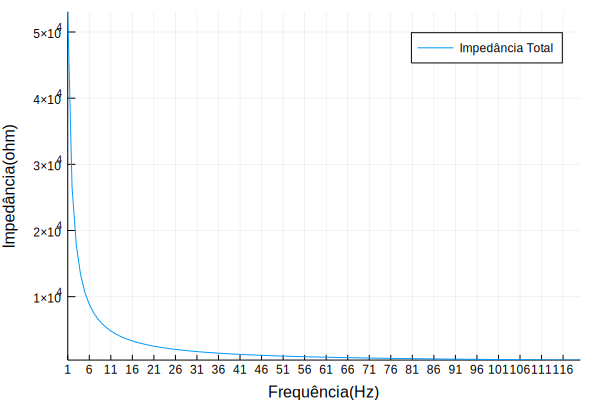

In [22]:
# Gráfico
using Plots
gr()

plot(Fq, ImpT, label = "Impedância Total", xticks = 1:5:120, xlabel = "Frequência(Hz)", ylabel = "Impedância(ohm)")

De acordo com o gráfico, a impedância do circuito diminui com o almento da frequência de tal forma que a impedância cai pela metade quando a frequência é aproximadamente 1.98 Hz

## CONTROLANDO A EXECUÇÃO DE FUNÇÕES (TASKS)

Julia possui um recurso de controle de fluxo chamado `Task` (Tarefas) que permite que os cálculos de uma função sejam suspensos e reiniciados de forma interativa. Esse recurso às vezes é chamado por outros nomes, como co-rotinas simétricas, segmentos leves, multitarefa cooperativa ou continuações one-shot. `Tasks` são ótimos quando é importante obter um valor de um laço que não sabemos o fim. Sintaxe:

Criar 
```julia
function nome_tarefa(argumentos)
    produce(instruções)
end

var = @task nome_tarefa(argumentos)
```
Executar
```julia
consume(var)
```

In [30]:
function teste_task(i)
    for n = 1:i
        produce([x^2 for x = 1:n])
    end
    produce("Fim Tarefa")
end

teste_task (generic function with 1 method)

In [31]:
teste = @task teste_task(3)

Task (runnable) @0x00007fcc4f42dcf0

In [32]:
consume(teste)

LoadError: UndefVarError: consume not defined

In [13]:
consume(teste)

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] consume(::Task) at ./deprecated.jl:946
 [3] include_string(::String, ::String) at ./loading.jl:515
 [4] include_string(::Module, ::String, ::String) at /home/jmarcellopereira/.julia/v0.6/Compat/src/Compat.jl:174
 [5] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /home/jmarcellopereira/.julia/v0.6/IJulia/src/execute_request.jl:154
 [6] (::Compat.#inner#16{Array{Any,1},IJulia.#execute_request,Tuple{ZMQ.Socket,IJulia.Msg}})() at /home/jmarcellopereira/.julia/v0.6/Compat/src/Compat.jl:496
 [7] eventloop(::ZMQ.Socket) at /home/jmarcellopereira/.julia/v0.6/IJulia/src/eventloop.jl:8
 [8] (::IJulia.##14#17)() at ./task.jl:335
while loading In[13], in expression starting on line 1
Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] produce(::Array{Int64,1}) at ./deprecated.jl:900
 [3] teste_task(::Int64) at ./In[1]:3
 [4] (::##5#6)() at ./task.jl:80
while loading In[13], in expression starting on line 1

2-element Array{Int64,1}:
 1
 4

In [14]:
consume(teste)

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] consume(::Task) at ./deprecated.jl:946
 [3] include_string(::String, ::String) at ./loading.jl:515
 [4] include_string(::Module, ::String, ::String) at /home/jmarcellopereira/.julia/v0.6/Compat/src/Compat.jl:174
 [5] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /home/jmarcellopereira/.julia/v0.6/IJulia/src/execute_request.jl:154
 [6] (::Compat.#inner#16{Array{Any,1},IJulia.#execute_request,Tuple{ZMQ.Socket,IJulia.Msg}})() at /home/jmarcellopereira/.julia/v0.6/Compat/src/Compat.jl:496
 [7] eventloop(::ZMQ.Socket) at /home/jmarcellopereira/.julia/v0.6/IJulia/src/eventloop.jl:8
 [8] (::IJulia.##14#17)() at ./task.jl:335
while loading In[14], in expression starting on line 1
Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] produce(::Array{Int64,1}) at ./deprecated.jl:900
 [3] teste_task(::Int64) at ./In[1]:3
 [4] (::##5#6)() at ./task.jl:80
while loading In[14], in expression starting on line 1

3-element Array{Int64,1}:
 1
 4
 9

In [15]:
consume(teste)

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] consume(::Task) at ./deprecated.jl:946
 [3] include_string(::String, ::String) at ./loading.jl:515
 [4] include_string(::Module, ::String, ::String) at /home/jmarcellopereira/.julia/v0.6/Compat/src/Compat.jl:174
 [5] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /home/jmarcellopereira/.julia/v0.6/IJulia/src/execute_request.jl:154
 [6] (::Compat.#inner#16{Array{Any,1},IJulia.#execute_request,Tuple{ZMQ.Socket,IJulia.Msg}})() at /home/jmarcellopereira/.julia/v0.6/Compat/src/Compat.jl:496
 [7] eventloop(::ZMQ.Socket) at /home/jmarcellopereira/.julia/v0.6/IJulia/src/eventloop.jl:8
 [8] (::IJulia.##14#17)() at ./task.jl:335
while loading In[15], in expression starting on line 1
Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] produce(::String) at ./deprecated.jl:900
 [3] teste_task(::Int64) at ./In[1]:5
 [4] (::##5#6)() at ./task.jl:80
while loading In[15], in expression starting on line 1


"Fim Tarefa"

In [48]:
?Channels

search: Channel RemoteChannel AbstractChannel

Couldn't find Channels
Perhaps you meant Channel or hankelh1


No documentation found.

Binding `Channels` does not exist.


Bibliografia

SOUSA, Lucas; Ruby: Aprenda a programar na linguagem mais divertida.

LAUREANO, Marcos. Programando em C para Linux, Unix e Windows / Marcos Laureano. – Rio de Janeiro: Brasport, 2005.

BALDUINO, Plinio. Dominando JavaScript com JQuery, casa do codigo
